In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import librosa
import csv
import scipy
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd drive/MyDrive/'ML Proyecto'

/content/drive/MyDrive/ML Proyecto


In [7]:
DATASET = './Dataset/Emotions' # Poner aqui la ruta del dataset

In [8]:
def ensure_sample_rate(waveform, original_sample_rate, desired_sample_rate=16000):
    if original_sample_rate != desired_sample_rate:
        desired_length = int(round(float(len(waveform)) / original_sample_rate * desired_sample_rate))
        waveform = scipy.signal.resample(waveform, desired_length)
    return waveform, desired_sample_rate

In [9]:
labels = {
    'Angry': 0,
    'Happy': 1,
    'Sad': 2,
    'Fearful': 3,
    'Disgusted': 4,
    'Neutral': 5,
    'Suprised': 6
}

In [10]:
def remove_silence(signal, threshold=0.005):
    """
    Remove silence at the beginning and at the end of the signal
    """
    for i in range(len(signal)):
        if np.abs(signal[i]) > threshold:
            break
    for j in range(len(signal)-1, 0, -1):
        if np.abs(signal[j]) > threshold:
            break
    return signal[i:j]

In [11]:
wav_path = f'{DATASET}/Angry/03-01-05-01-01-01-01.wav'
wav_data, sample_rate = librosa.load(wav_path)
print(f'Original sample rate: {sample_rate} Hz')

# Ensure that the sample rate is set to 16 kHz and calculate the sample length in seconds.
waveform, sample_rate = ensure_sample_rate(wav_data, sample_rate)
duration = len(waveform)/sample_rate

# Show some basic information about the audio.
print(f'Model Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(waveform)}')

# Listening to the wav file.
Audio(waveform, rate=sample_rate)

Original sample rate: 22050 Hz
Model Sample rate: 16000 Hz
Total duration: 3.87s
Size of the input: 61929


In [12]:
lst = []
i = 0
start_time = time.time()
for subdir, dirs, files in os.walk(DATASET):
  print(subdir)
  print(i)
  for file in files:
    X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
    X = remove_silence(X)
    if len(X) == 0:
      continue

    mfcc_values = librosa.feature.mfcc(y=X, sr=sample_rate, n_fft=4096, hop_length=256, n_mfcc=128).T 
    mfccs_mean = np.mean(mfcc_values, axis=0) # media en los coeficientes
    mfccs_std = np.std(mfcc_values, axis=0) # Desviación estandar en los coeficientes
    mfccs = np.concatenate((mfccs_mean, mfccs_std), axis=0)
    lst.append((mfccs, i))

  if files:
    i = i + 1
    print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

./Dataset/Emotions
0
./Dataset/Emotions/Angry
0
--- Data loaded. Loading time: 231.40571880340576 seconds ---
./Dataset/Emotions/Disgusted
1
--- Data loaded. Loading time: 393.00942182540894 seconds ---
./Dataset/Emotions/Fearful
2
--- Data loaded. Loading time: 582.857213973999 seconds ---
./Dataset/Emotions/Happy
3
--- Data loaded. Loading time: 790.6746945381165 seconds ---
./Dataset/Emotions/Neutral
4
--- Data loaded. Loading time: 950.4648985862732 seconds ---
./Dataset/Emotions/Sad
5
--- Data loaded. Loading time: 1170.2320621013641 seconds ---
./Dataset/Emotions/Suprised
6
--- Data loaded. Loading time: 1238.5438706874847 seconds ---


# Analisis de Audio

In [13]:
#Adicionar las rutas

file1='/content/drive/MyDrive/ML Proyecto/Dataset/Emotions/Neutral/03-02-01-01-02-02-20.wav'
signal1, sample_rate = librosa.load(file1, sr=22050)

file2='/content/drive/MyDrive/ML Proyecto/Dataset/Emotions/Neutral/1007_WSI_NEU_XX.wav'
signal2, sample_rate = librosa.load(file2, sr=22050)

file3='/content/drive/MyDrive/ML Proyecto/Dataset/Emotions/Neutral/n01.wav'
signal3, sample_rate = librosa.load(file3, sr=22050)

file4='/content/drive/MyDrive/ML Proyecto/Dataset/Emotions/Neutral/YAF_vote_neutral.wav'
signal4, sample_rate = librosa.load(file4, sr=22050)

emotion='Neutral'

## Grafica de las formas de Onda

Text(0.5, 1.0, 'TESS Waveform Neutral')

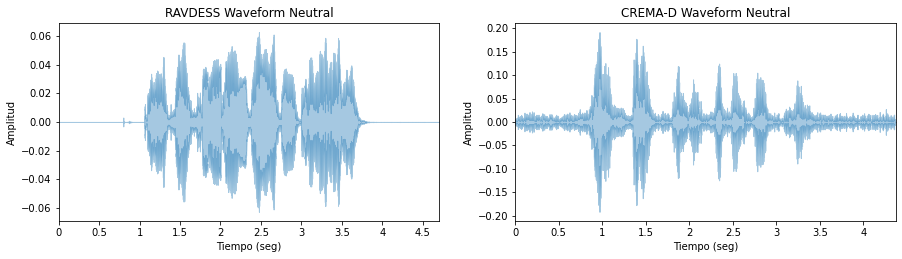

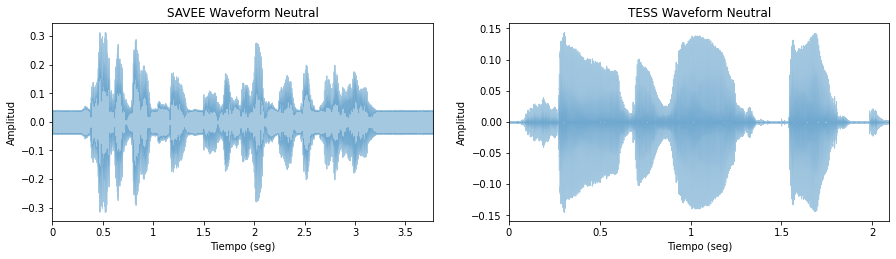

In [14]:
from librosa import display
fig = plt.figure(figsize=(15,8))
# Forma de Onda
# Muestra las formas de Onda para el sentimiento Neutral
plt.subplot(2, 2, 1)
librosa.display.waveplot(signal1,sample_rate, alpha=0.4)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.title("RAVDESS Waveform "+emotion)

plt.subplot(2, 2, 2)
librosa.display.waveplot(signal2,sample_rate, alpha=0.4)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.title("CREMA-D Waveform "+emotion)


fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 3)
librosa.display.waveplot(signal3,sample_rate, alpha=0.4)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.title("SAVEE Waveform "+emotion)

plt.subplot(2, 2, 4)
librosa.display.waveplot(signal4,sample_rate, alpha=0.4)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.title("TESS Waveform "+emotion)

## Espectros y Transformada de Fourier

Text(0.5, 1.0, 'TESS Power Espectro Neutral')

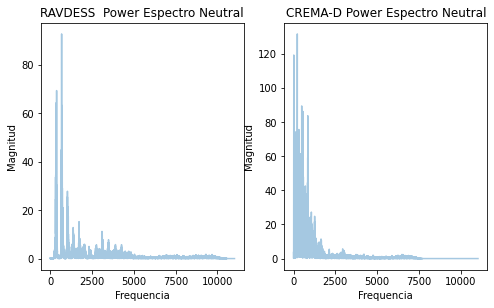

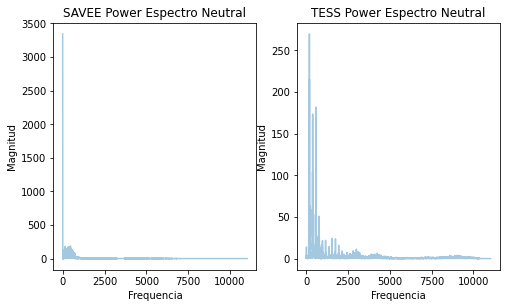

In [15]:
# Transformada de Fourier para la señal
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)

# calculo de los valores absolutos en numeros complejos para obtener la magnitud
spectrum1 = np.abs(fft1)
spectrum2 = np.abs(fft2)
spectrum3 = np.abs(fft3)
spectrum4 = np.abs(fft4)

# Crear la frecuencia variable
f1 = np.linspace(0, sample_rate, len(spectrum1)) 
f2 = np.linspace(0, sample_rate, len(spectrum2))
f3 = np.linspace(0, sample_rate, len(spectrum3))
f4 = np.linspace(0, sample_rate, len(spectrum4))

# Tomar la mitad del espectro y la frecuencia
left_spectrum1 = spectrum1[:int(len(spectrum1)/2)]
left_f1 = f1[:int(len(spectrum1)/2)]
# tomar la mitad del espectro y la frecuencia
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
# tomar la mitad del espectro y la frecuencia
left_spectrum3 = spectrum3[:int(len(spectrum3)/2)]
left_f3 = f3[:int(len(spectrum3)/2)]
# tomar la mitad del espectro y la frecuencia (Ahora los datos estan en el dominio de la frecuencia)
left_spectrum4 = spectrum4[:int(len(spectrum4)/2)]
left_f4 = f4[:int(len(spectrum4)/2)]

fig = plt.figure(figsize=(8,10))
plt.subplot(2, 2, 1)
# Gráfica del Espectro
plt.plot(left_f1, left_spectrum1, alpha=0.4)
plt.xlabel("Frequencia")
plt.ylabel("Magnitud")
plt.title("RAVDESS  Power Espectro "+emotion)

plt.subplot(2, 2,2)
# Grafica del espectro
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequencia")
plt.ylabel("Magnitud")
plt.title("CREMA-D Power Espectro "+emotion)


fig = plt.figure(figsize=(8,10))

plt.subplot(2, 2, 3)
plt.plot(left_f3, left_spectrum3, alpha=0.4)
plt.xlabel("Frequencia")
plt.ylabel("Magnitud")
plt.title("SAVEE Power Espectro "+emotion)

plt.subplot(2, 2, 4)
plt.plot(left_f4, left_spectrum4, alpha=0.4)
plt.xlabel("Frequencia")
plt.ylabel("Magnitud")
plt.title("TESS Power Espectro "+emotion)

In [16]:
fft1

array([-0.11416428-5.55111512e-16j,  0.02947607-7.03210368e-02j,
        0.07230933-4.44130313e-03j, ..., -0.01104562-9.56313540e-02j,
        0.07230933+4.44130313e-03j,  0.02947607+7.03210368e-02j])

In [17]:
spectrum1

array([0.11416428, 0.07624885, 0.0724456 , ..., 0.09626714, 0.0724456 ,
       0.07624885])

## Espectrogramas


La duración del hop length STFT es: 0.011609977324263039s
La duración de la ventana STFT es: 0.18575963718820862s


Text(0.5, 1.0, 'TESS Espectrograma Neutral')

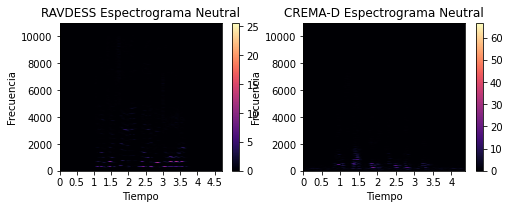

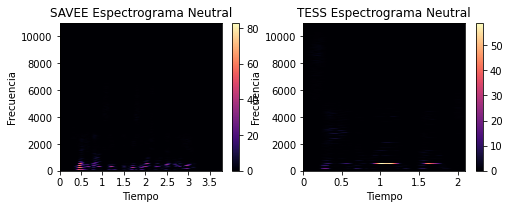

In [18]:
# STFT -> Espectrograma
#La longitud de salto (hop length) es la longitud de la parte que no se cruza de la longitud de la ventana.
hop_length =256 # número de muestras de audio entre columnas STFT adyacentes.
n_fft = 4096 # ventana en numero de muestras de audio

# calculo de la duración del hop length y la ventan en segundos
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("La duración del hop length STFT es: {}s".format(hop_length_duration))
print("La duración de la ventana STFT es: {}s".format(n_fft_duration))

# se realiza el stft (Transformada de Fourier de Tiempo Corto)
stft1 = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length) # devuelve una matriz de numeros complejos
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
stft3 = librosa.stft(signal3, n_fft=n_fft, hop_length=hop_length)
stft4 = librosa.stft(signal4, n_fft=n_fft, hop_length=hop_length)

# calcula los valores absolutos en numeros complejos para obtener su magnitud
spectrogram1 = np.abs(stft1)
spectrogram2 = np.abs(stft2)
spectrogram3 = np.abs(stft3)
spectrogram4 = np.abs(stft4)

# Muestra los espectrogramas
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram1, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.title("RAVDESS Espectrograma "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(spectrogram2, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.title("CREMA-D Espectrograma "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(spectrogram3, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.title("SAVEE Espectrograma "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(spectrogram4, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.title("TESS Espectrograma "+emotion)

In [19]:
#Para visualizar mejor el espectrograma se opta aplicar el logaritmo para convertir la amplitud en decibelios
log_spectrogram1 = librosa.amplitude_to_db(spectrogram1)
log_spectrogram2 = librosa.amplitude_to_db(spectrogram2)
log_spectrogram3 = librosa.amplitude_to_db(spectrogram3)
log_spectrogram4 = librosa.amplitude_to_db(spectrogram4)

Text(0.5, 1.0, 'TESS Espectrograma (dB) Neutral')

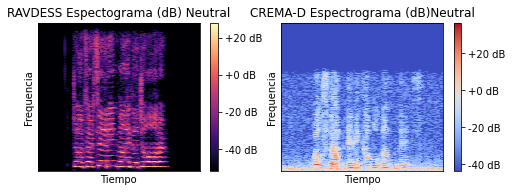

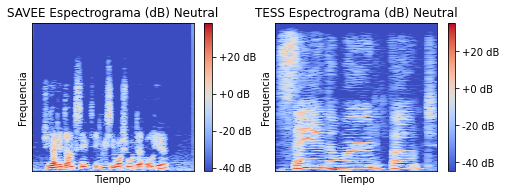

In [20]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(log_spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frequencia")
plt.colorbar(format="%+2.0f dB")
plt.title("RAVDESS Espectograma (dB) "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(log_spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frequencia")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Espectrograma (dB)"+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(log_spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frequencia")
plt.colorbar(format="%+2.0f dB")
plt.title("SAVEE Espectrograma (dB) "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(log_spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frequencia")
plt.colorbar(format="%+2.0f dB")
plt.title("TESS Espectrograma (dB) "+emotion)

Text(0.5, 1.0, 'TESS MFCCs Neutral')

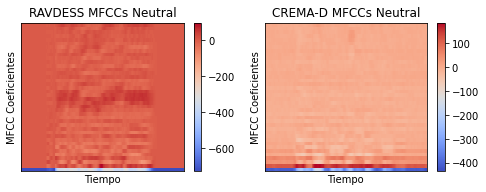

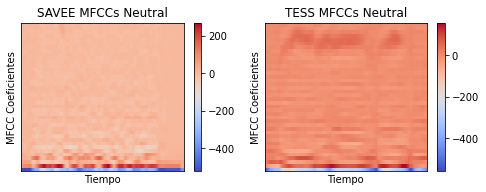

In [21]:
# MFCCs
# Extracción de los MFCC
MFCCs1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
# Mostrar los MFCC
hop_length=256 
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(MFCCs1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("MFCC Coeficientes")
plt.colorbar()
plt.title("RAVDESS MFCCs "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(MFCCs2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("MFCC Coeficientes")
plt.colorbar()
plt.title("CREMA-D MFCCs "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(MFCCs3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("MFCC Coeficientes")
plt.colorbar()
plt.title("SAVEE MFCCs "+emotion)


plt.subplot(2, 2, 4)
librosa.display.specshow(MFCCs4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("MFCC Coeficientes")
plt.colorbar()
plt.title("TESS MFCCs "+emotion)                             

Los Coeficientes Cepstrales en la Escala de Mel(MFCC) representan la amplitud del espectro del habla de manera compacta, esto los ha vuelto la técnica de extracción de características más usada en reconocimiento del habla.[MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22)





# Clasificador

In [22]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [23]:
# Creando X e y: zip crea una lista de todos los primeros elementos y una lista de todos los segundos elementos.
X, y = zip(*lst)
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#Como siempre, necesitamos expandir las dimensiones, para que podamos ingresar los datos a NN.
x_trainn = np.expand_dims(X_train, axis=2) 
x_testnn = np.expand_dims(X_test, axis=2)
x_valnn = np.expand_dims(X_val, axis=2)

print("Tamaño de Training: ", x_trainn.shape)
print("Tamaño de Testing: ", x_testnn.shape)
print("Tamaño de Validation: ", x_valnn.shape)

Tamaño de Training:  (7678, 256, 1)
Tamaño de Testing:  (2559, 256, 1)
Tamaño de Validation:  (2560, 256, 1)


In [50]:
x_trainn

array([[[-328.8869   ],
        [  55.445618 ],
        [  -0.7368443],
        ...,
        [   1.3925991],
        [   1.8945427],
        [   1.5843867]],

       [[-225.25125  ],
        [  39.647903 ],
        [ -19.922417 ],
        ...,
        [   1.4539429],
        [   1.5032793],
        [   1.5195425]],

       [[-151.03195  ],
        [   7.031327 ],
        [ -77.56415  ],
        ...,
        [   1.0692022],
        [   1.774072 ],
        [   1.0439705]],

       ...,

       [[-238.66832  ],
        [  42.31922  ],
        [ -73.04831  ],
        ...,
        [   1.9214598],
        [   1.9975938],
        [   1.66373  ]],

       [[-423.6192   ],
        [ 156.9059   ],
        [   7.506245 ],
        ...,
        [   1.452354 ],
        [   1.7186594],
        [   1.6751837]],

       [[-231.95912  ],
        [  92.1383   ],
        [ -62.449337 ],
        ...,
        [   1.8099308],
        [   1.4888023],
        [   1.7668413]]], dtype=float32)

In [24]:
lst

Output hidden; open in https://colab.research.google.com to view.

In [25]:
model = keras.Sequential([

        # Capa de entrada
        keras.layers.Flatten(input_shape=(256, 1)),
        # Primera capa densa
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)), # Regularizador para aplicar una penalización en el kernel de la capa, L2 para que el modelo generalice un poco mejor
        keras.layers.Dropout(0.3),
        # Segunda capa densa
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        # Tercera capa densa
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.2),
        # Capa de salida
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(x_trainn, y_train, batch_size=64, epochs=2000, validation_data=(x_valnn, y_val))

Epoch 1/2000
120/120 [==============================] - 4s 7ms/step - loss: 52.8428 - accuracy: 0.1134 - val_loss: 33.6735 - val_accuracy: 0.1383
Epoch 2/2000
120/120 [==============================] - 0s 4ms/step - loss: 47.3396 - accuracy: 0.1261 - val_loss: 31.8122 - val_accuracy: 0.1793
Epoch 3/2000
120/120 [==============================] - 0s 4ms/step - loss: 43.7193 - accuracy: 0.1420 - val_loss: 31.1465 - val_accuracy: 0.2684
Epoch 4/2000
120/120 [==============================] - 1s 5ms/step - loss: 40.7744 - accuracy: 0.1508 - val_loss: 30.4476 - val_accuracy: 0.2758
Epoch 5/2000
120/120 [==============================] - 1s 4ms/step - loss: 38.7618 - accuracy: 0.1530 - val_loss: 29.5513 - val_accuracy: 0.2719
Epoch 6/2000
120/120 [==============================] - 0s 4ms/step - loss: 37.0470 - accuracy: 0.1516 - val_loss: 28.5485 - val_accuracy: 0.2734
Epoch 7/2000
120/120 [==============================] - 1s 5ms/step - loss: 35.2907 - accuracy: 0.1662 - val_loss: 27.4905 -

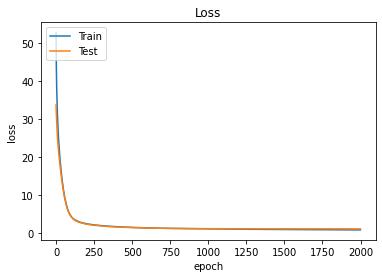

In [39]:
# Gráfica del la perdida del Modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

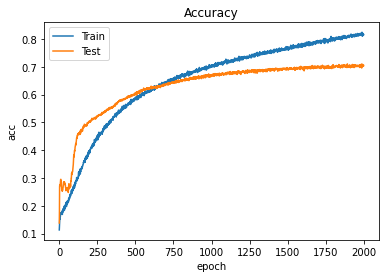

In [40]:
# Gráfica del Accuracy del Modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(x_testnn),axis=1)
y_test = y_test.astype(int)
report = classification_report(y_test, predictions)
print(report)

80/80 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       456
           1       0.66      0.64      0.65       372
           2       0.63      0.67      0.65       414
           3       0.70      0.68      0.69       410
           4       0.77      0.74      0.75       383
           5       0.69      0.73      0.71       403
           6       0.89      0.92      0.90       121

    accuracy                           0.72      2559
   macro avg       0.74      0.74      0.74      2559
weighted avg       0.72      0.72      0.72      2559



In [42]:
y_test

array([5, 0, 5, ..., 1, 2, 1])

In [43]:
predictions

array([5, 0, 5, ..., 2, 2, 1])

## Matriz de confusion

In [44]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)

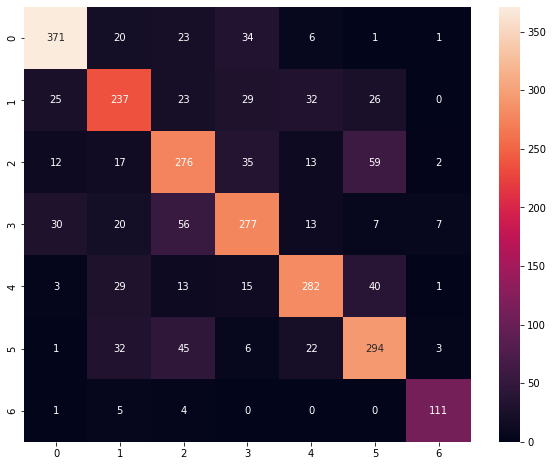

In [45]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d");

In [49]:
import pickle
pickle.dump(model, open('models/NN_model.model','wb'))

In [52]:
np.save('Dataset/xtrain_datann.npy', x_trainn)

In [53]:
np.save('Dataset/xtest_datann.npy', x_testnn)

In [54]:
np.save('Dataset/xval_datann.npy', x_valnn)